---
### 【 1. 도미 데이터 】    
---

In [4]:
# 도미의 길이와 무게 
bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0]
bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]

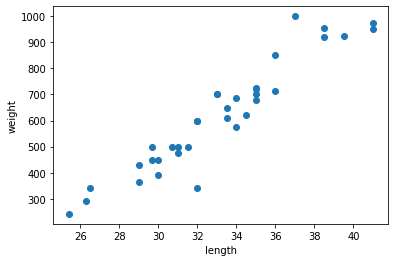

In [5]:
# 도미 데이터의 특징을 이용해서 산점도로 표현 
import matplotlib.pyplot as plt               # matplotlib의 pyplot 함수를 plt로 줄여서 사용
plt.scatter(bream_length, bream_weight)       # (x,y) = (bream_length, bream_weight)
plt.xlabel('length')    # x축의 이름을 화면에 표시
plt.ylabel('weight')    # y축의 이름을 화면에 표시 
plt.show()              # 준비된 그래프를 화면에 출력

# → 2개의 특성(=데이터의 특징)을 사용해 그린 그래프이기 때문에 '2차원 그래프'라고 말함

---
### 【 2. 빙어 데이터 】  
---

In [6]:
# 빙어의 길이와 무게 
smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

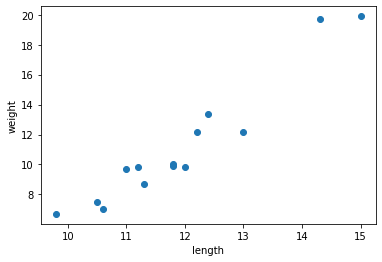

In [7]:
# import matplotlib.pyplot as plt           # 한 번 import된 패키지는 그 파일 안에서 다시 import하지 않아도 됨
plt.scatter(smelt_length, smelt_weight)     # (x,y) = (smelt_length, smelt_weight)
plt.xlabel('length')    # x축의 이름을 화면에 표시  
plt.ylabel('weight')    # y축의 이름을 화면에 표시
plt.show()              # 준비된 그래프를 화면에 출력

---
### 【 3. 도미 & 빙어 데이터를 산점도에 함께 표현 】  
--- 

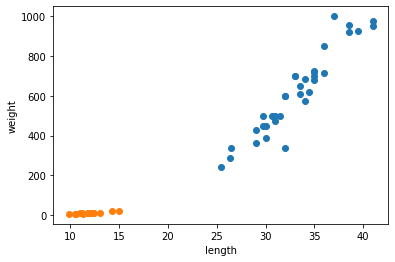

In [8]:
plt.scatter(bream_length, bream_weight)       # (x,y) = (bream_length, bream_weight)
plt.scatter(smelt_length, smelt_weight)       # (x,y) = (smelt_length, smelt_weight)
plt.xlabel('length')    # x축의 이름을 화면에 표시
plt.ylabel('weight')    # y축의 이름을 화면에 표시
plt.show()              # 준비된 그래프를 화면에 출력

* 파란색 점 : 도미의 산점도
* 주황색 점 : 빙어의 산점도

---
### 【 4. k-최근접 이웃(k-Nearest Neighbors) 알고리즘 】  
___

#### 1. 도미 & 빙어 데이터 합치기 

In [9]:
length  = bream_length + smelt_length
weight = bream_weight + smelt_weight


#### 2. 2차원 리스트 만들기

In [10]:
fish_data = [[l, w] for l, w in zip(length, weight)]
print(fish_data)    # 생성된 2차원 리스트 확인하기

[[25.4, 242.0], [26.3, 290.0], [26.5, 340.0], [29.0, 363.0], [29.0, 430.0], [29.7, 450.0], [29.7, 500.0], [30.0, 390.0], [30.0, 450.0], [30.7, 500.0], [31.0, 475.0], [31.0, 500.0], [31.5, 500.0], [32.0, 340.0], [32.0, 600.0], [32.0, 600.0], [33.0, 700.0], [33.0, 700.0], [33.5, 610.0], [33.5, 650.0], [34.0, 575.0], [34.0, 685.0], [34.5, 620.0], [35.0, 680.0], [35.0, 700.0], [35.0, 725.0], [35.0, 720.0], [36.0, 714.0], [36.0, 850.0], [37.0, 1000.0], [38.5, 920.0], [38.5, 955.0], [39.5, 925.0], [41.0, 975.0], [41.0, 950.0], [9.8, 6.7], [10.5, 7.5], [10.6, 7.0], [11.0, 9.7], [11.2, 9.8], [11.3, 8.7], [11.8, 10.0], [11.8, 9.9], [12.0, 9.8], [12.2, 12.2], [12.4, 13.4], [13.0, 12.2], [14.3, 19.7], [15.0, 19.9]]


#### 3. 정답 데이터 만들기

In [21]:
fish_target = [1] * 35 + [0] * 14 
print(fish_target)  # 생성된 정답 데이터 확인하기

# 도미 = 1
# 빙어 = 0

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


#### 4. k-최근접 이웃 알고리즘을 구현한 KNeighborsClassifier를 import하기 

In [12]:
from sklearn.neighbors import KNeighborsClassifier # from 모듈이름 import 함수이름 (모듈 == 클래스)

#### 5. KNeighborsClassifier 클래스의 객체 생성하기

In [13]:
kn = KNeighborsClassifier()

#### 6. 객체(또는 모델) kn 훈련하기

In [15]:
kn.fit(fish_data, fish_target)  # fish_data와 fish_target 데이터를 객체(또는 모델)에 전달하고, 이를 fit()메서드를 통해 학습시킴

KNeighborsClassifier()

#### 7. 객체(또는 모델) kn 평가하기 

In [18]:
kn.score(fish_data, fish_target)   # score()메서드를 통해 모델을 평가함

1.0

---
### 【 5. k-최근접 이웃(k-Nearest Neighbors) 알고리즘을 이용한 예측 】  
___

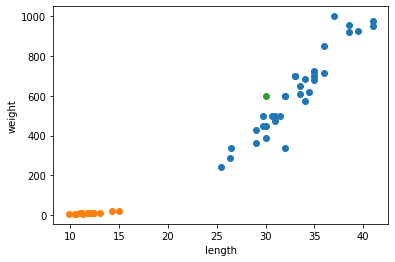

In [24]:
plt.scatter(bream_length, bream_weight)       # (x,y) = (bream_length, bream_weight)
plt.scatter(smelt_length, smelt_weight)       # (x,y) = (smelt_length, smelt_weight)
plt.scatter(30,600)                           # 새로운 데이터 (x,y) = (30, 600)
plt.xlabel('length')    # x축의 이름을 화면에 표시
plt.ylabel('weight')    # y축의 이름을 화면에 표시
plt.show()              # 준비된 그래프를 화면에 출력

In [25]:
kn.predict([[30, 600]])

# 결과 : array([1]), 즉 도미(1)

array([1])

In [27]:
print(kn._fit_X)

[[  25.4  242. ]
 [  26.3  290. ]
 [  26.5  340. ]
 [  29.   363. ]
 [  29.   430. ]
 [  29.7  450. ]
 [  29.7  500. ]
 [  30.   390. ]
 [  30.   450. ]
 [  30.7  500. ]
 [  31.   475. ]
 [  31.   500. ]
 [  31.5  500. ]
 [  32.   340. ]
 [  32.   600. ]
 [  32.   600. ]
 [  33.   700. ]
 [  33.   700. ]
 [  33.5  610. ]
 [  33.5  650. ]
 [  34.   575. ]
 [  34.   685. ]
 [  34.5  620. ]
 [  35.   680. ]
 [  35.   700. ]
 [  35.   725. ]
 [  35.   720. ]
 [  36.   714. ]
 [  36.   850. ]
 [  37.  1000. ]
 [  38.5  920. ]
 [  38.5  955. ]
 [  39.5  925. ]
 [  41.   975. ]
 [  41.   950. ]
 [   9.8    6.7]
 [  10.5    7.5]
 [  10.6    7. ]
 [  11.     9.7]
 [  11.2    9.8]
 [  11.3    8.7]
 [  11.8   10. ]
 [  11.8    9.9]
 [  12.     9.8]
 [  12.2   12.2]
 [  12.4   13.4]
 [  13.    12.2]
 [  14.3   19.7]
 [  15.    19.9]]


In [30]:
print(kn._y)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0]


---
### 【 6. k-최근접 이웃(k-Nearest Neighbors) 알고리즘의 참고 데이터 지정 방법 】  
___

In [31]:
kn49 = KNeighborsClassifier(n_neighbors = 49)   # 참고 데이터를 49개로 한 kn49 모델

In [33]:
kn49.fit(fish_data, fish_target)
kn49.score(fish_data, fish_target)

0.7142857142857143

In [34]:
print(35/49)

0.7142857142857143
